In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False
from sktime.transformations.series.boxcox import BoxCoxTransformer

# loading the data

In [26]:
df = pd.read_csv('./data/Quarterly_Australian_Gas_Production_777_37.csv',)
df.drop(['Unnamed: 0',"X"], axis=1, inplace=True)

def parse_date(date):
    strDate = str(date)
    # return a datetime object
    if strDate[-2:] == '.0':
        strDate = strDate[:-2] + '.01'
        return pd.to_datetime(strDate, format='%Y.%m')
    elif strDate[-2:] == '25':
        strDate = strDate[:-2] + '04'
        return pd.to_datetime(strDate, format='%Y.%m')
    elif strDate[-2:] == '.5':
        strDate = strDate[:-2] + '.07'
        return pd.to_datetime(strDate, format='%Y.%m')
    elif strDate[-2:] == '75':
        strDate = strDate[:-2] + '10'
        return pd.to_datetime(strDate, format='%Y.%m')
    
df['Date'] = df['time'].apply(parse_date)
df.drop(['time'], axis=1, inplace=True)
df.set_index('Date', inplace=True)
df

,value
Date,
1956-01-01,5.149
1956-04-01,6.372
1956-07-01,7.068
1956-10-01,5.908
1957-01-01,5.359
...,...
2009-04-01,238.000
2009-07-01,252.000
2009-10-01,210.000


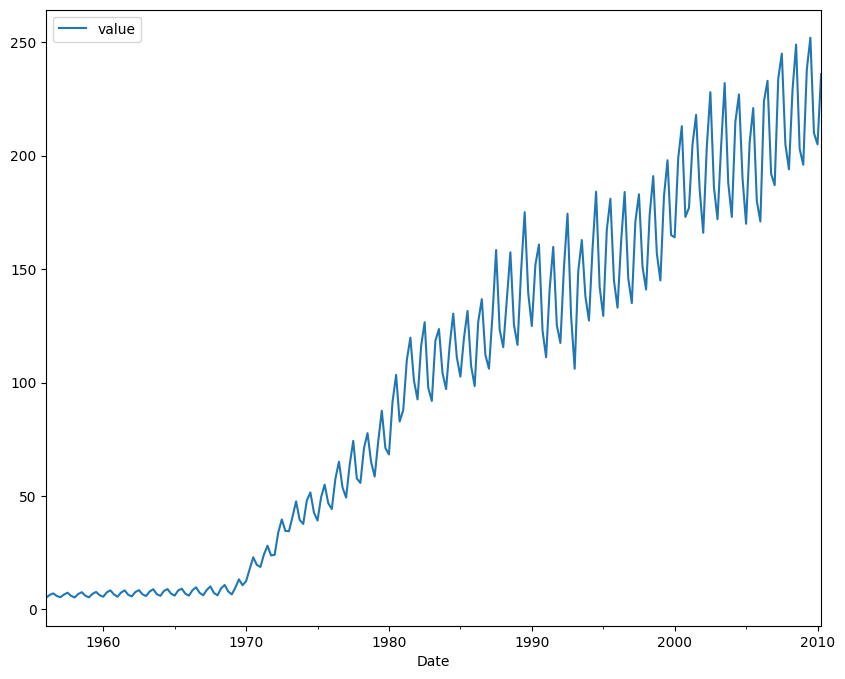

In [27]:
df.plot(label='Quarterly Australian Gas Production')
plt.legend()
plt.show()

# using boxcox transformation

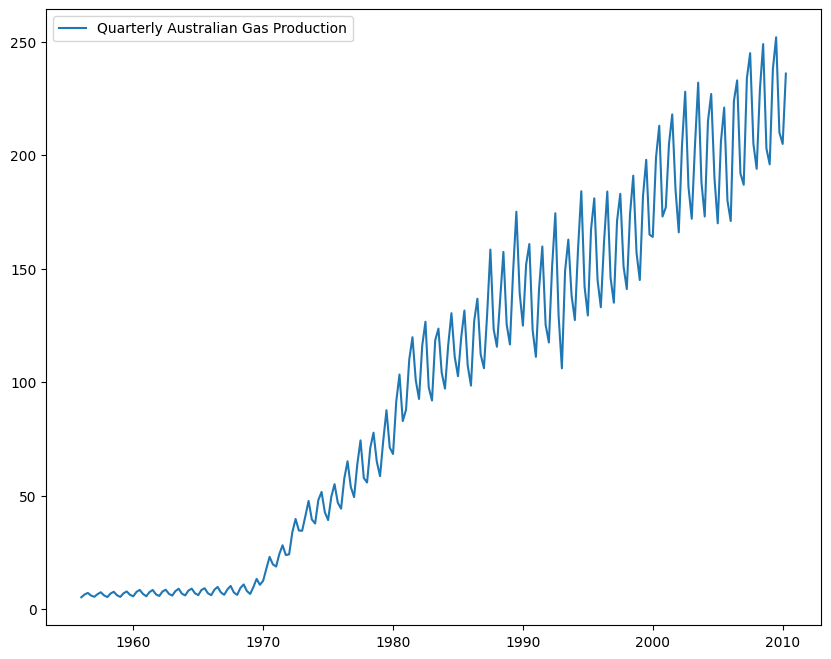

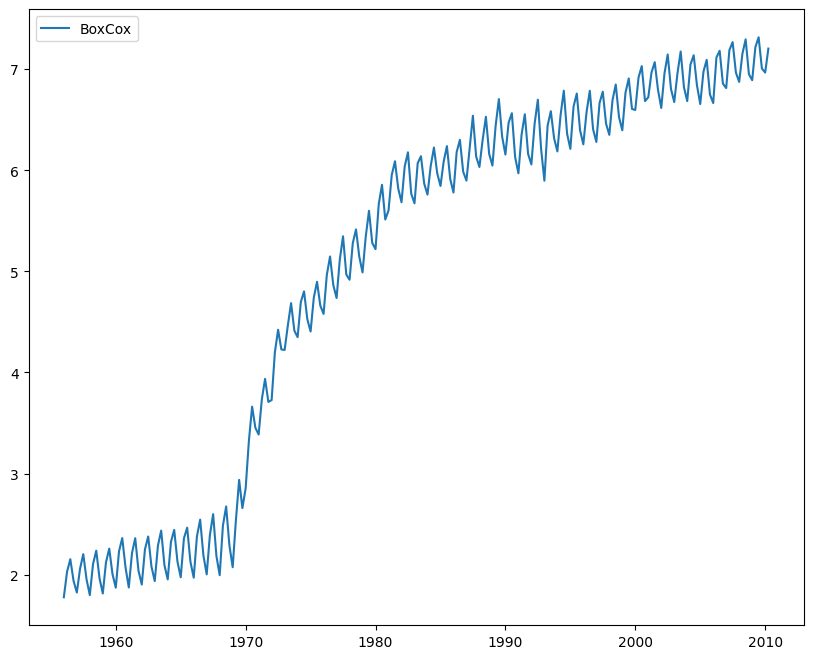

{'lambda': 0.09694325844478899}


In [28]:
transformer = BoxCoxTransformer(method='guerrero',sp=4)
BoxCox_y_hat = transformer.fit_transform(df)
plt.plot(df, label='Quarterly Australian Gas Production')
plt.legend()
plt.show()
plt.plot(BoxCox_y_hat, label='BoxCox')
plt.legend()
plt.show()
print(transformer.get_fitted_params())

In [29]:
tstest = kpss(BoxCox_y_hat, "ct")
tstest

C:\Users\triro\AppData\Local\Temp\ipykernel_802156\2960800992.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.4581927168654034,
 0.01,
 9,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

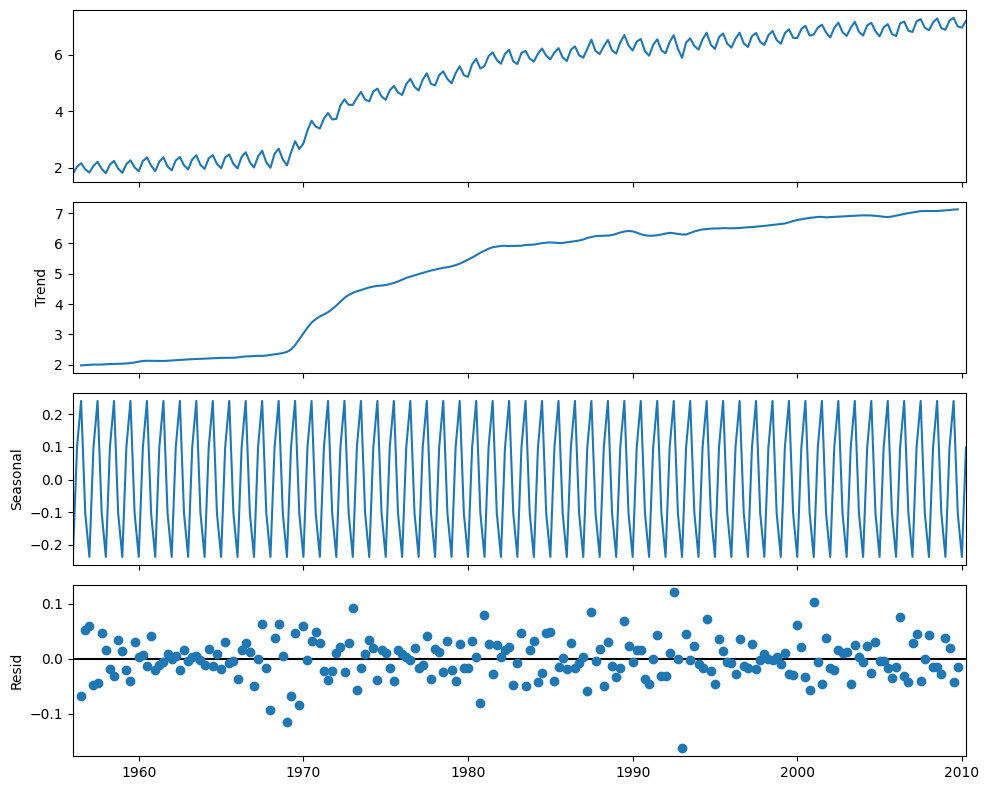

In [30]:
res = sm.tsa.seasonal_decompose(BoxCox_y_hat)

resplot = res.plot()

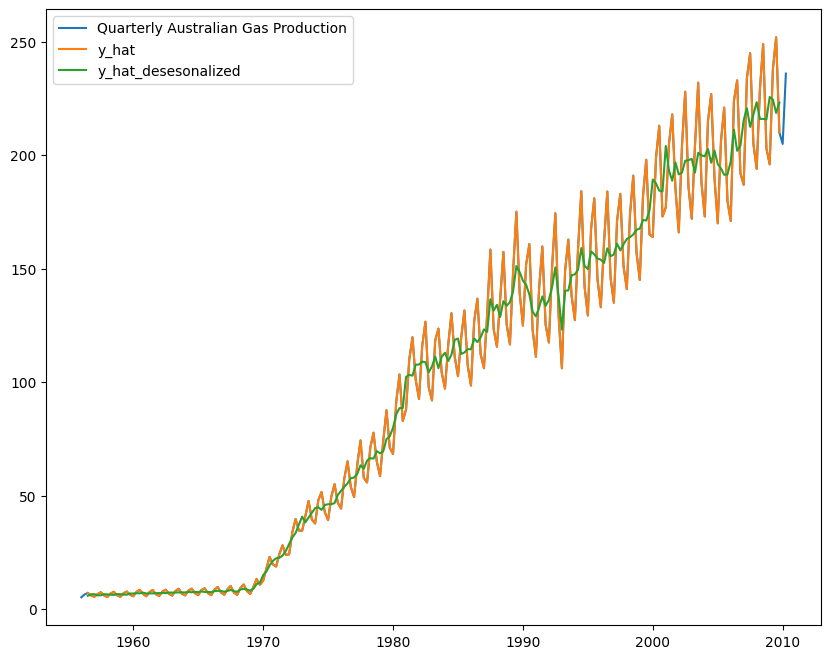

In [31]:
y_hat = pd.Series(res.trend + res.resid + res.seasonal)
y_hat_desesonalized = y_hat - res.seasonal
plt.plot(df.value, label='Quarterly Australian Gas Production')
plt.plot(transformer.inverse_transform(y_hat), label='y_hat')
plt.plot(transformer.inverse_transform(y_hat_desesonalized), label='y_hat_desesonalized')
plt.legend()
plt.show()

# loading amazoon revenue dataset

In [32]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
amazon_df=df.set_index("Quarter")
amazon_df

C:\Users\triro\AppData\Local\Temp\ipykernel_802156\257237286.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561
...,...,...
2006-03-31,2279,51
2005-12-31,2977,199
2005-09-30,1858,30


In [33]:
fig = px.line(amazon_df, y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [34]:
tstest = kpss(amazon_df["Revenue"], "ct")
tstest

C:\Users\triro\AppData\Local\Temp\ipykernel_802156\1374717764.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.30665545975169706,
 0.01,
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

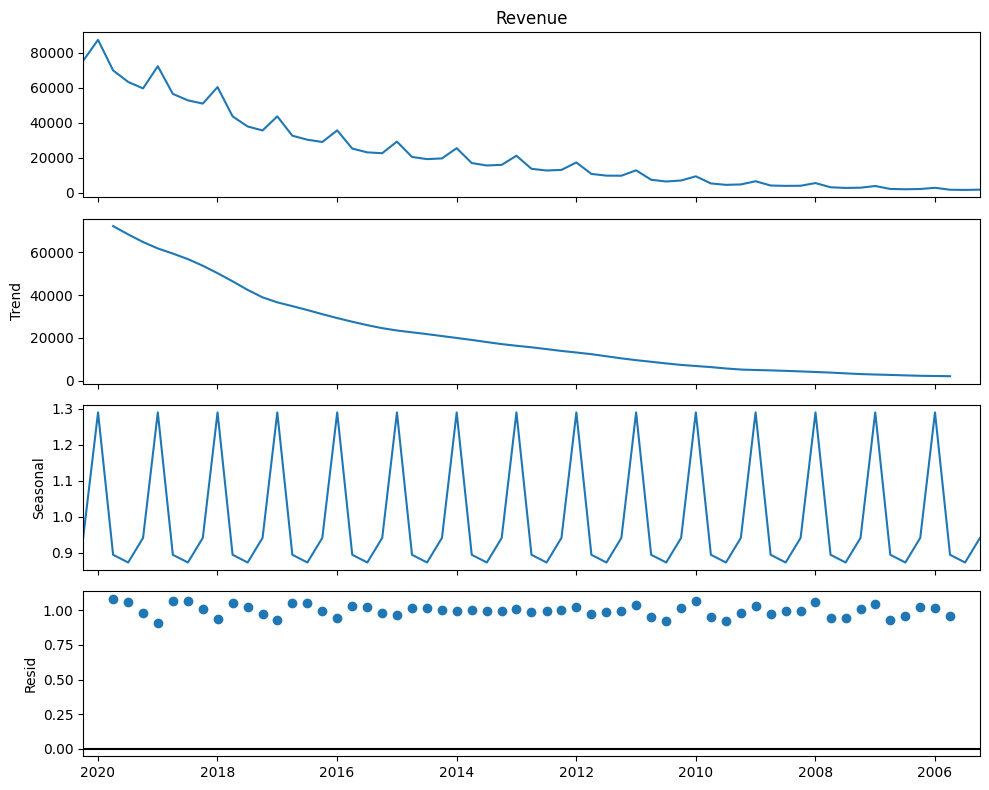

In [35]:
res = sm.tsa.seasonal_decompose(amazon_df["Revenue"], model="multiplicative")

resplot = res.plot()

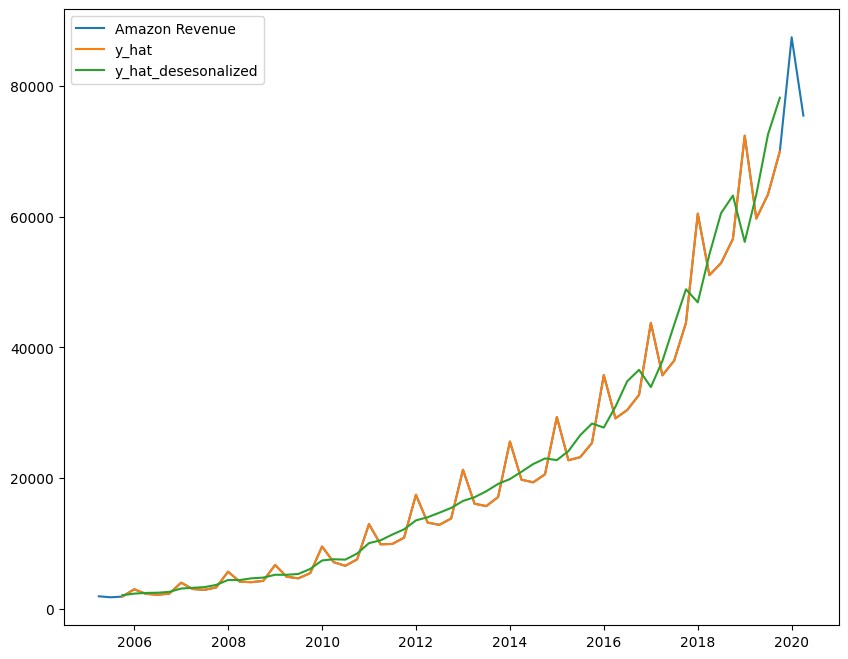

In [36]:
log_y_hat = pd.Series(np.log(res.trend) + np.log(res.resid) + np.log(res.seasonal))
# reverse the transformation
y_hat = np.exp(log_y_hat)
y_hat_desesonalized = np.exp(log_y_hat - np.log(res.seasonal))
plt.plot(amazon_df.Revenue, label='Amazon Revenue')
plt.plot(y_hat, label='y_hat')
plt.plot(y_hat_desesonalized, label='y_hat_desesonalized')
plt.legend()
plt.show()